### OCI Data Science - Useful Tips
<details>
<summary><font size="2">Check for Public Internet Access</font></summary>

```python
import requests
response = requests.get("https://oracle.com")
assert response.status_code==200, "Internet connection failed"
```
</details>
<details>
<summary><font size="2">Helpful Documentation </font></summary>
<ul><li><a href="https://docs.cloud.oracle.com/en-us/iaas/data-science/using/data-science.htm">Data Science Service Documentation</a></li>
<li><a href="https://docs.cloud.oracle.com/iaas/tools/ads-sdk/latest/index.html">ADS documentation</a></li>
</ul>
</details>
<details>
<summary><font size="2">Typical Cell Imports and Settings for ADS</font></summary>

```python
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

import ads
from ads.dataset.factory import DatasetFactory
from ads.automl.provider import OracleAutoMLProvider
from ads.automl.driver import AutoML
from ads.evaluations.evaluator import ADSEvaluator
from ads.common.data import ADSData
from ads.explanations.explainer import ADSExplainer
from ads.explanations.mlx_global_explainer import MLXGlobalExplainer
from ads.explanations.mlx_local_explainer import MLXLocalExplainer
from ads.catalog.model import ModelCatalog
from ads.common.model_artifact import ModelArtifact
```
</details>
<details>
<summary><font size="2">Useful Environment Variables</font></summary>

```python
import os
print(os.environ["NB_SESSION_COMPARTMENT_OCID"])
print(os.environ["PROJECT_OCID"])
print(os.environ["USER_OCID"])
print(os.environ["TENANCY_OCID"])
print(os.environ["NB_REGION"])
```
</details>

  warnings.warn(



,LogisticRegression,RandomForestClassifier
Accuracy,0.8453,0.9037
Hamming distance,0.1547,0.0963
Precision,0.8293,0.9003
Recall,0.8702,0.9081
F1,0.8493,0.9042
ROC AUC,0.9019,0.9392


,LogisticRegression,RandomForestClassifier
Accuracy,0.8489,0.9997
Hamming distance,0.1511,0.0003
Precision,0.8385,1.0000
Recall,0.8662,0.9994
F1,0.8521,0.9997
ROC AUC,0.9018,1.0000



  evaluation.loc["percentages"][perf_idx][1:],

  [1] + list(evaluation.loc["perfect_lift"][perf_idx]),

  evaluation.loc["percentages"][perf_idx],

  evaluation.loc["perfect_gain"][perf_idx],



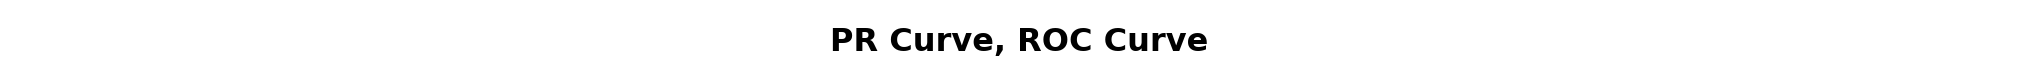

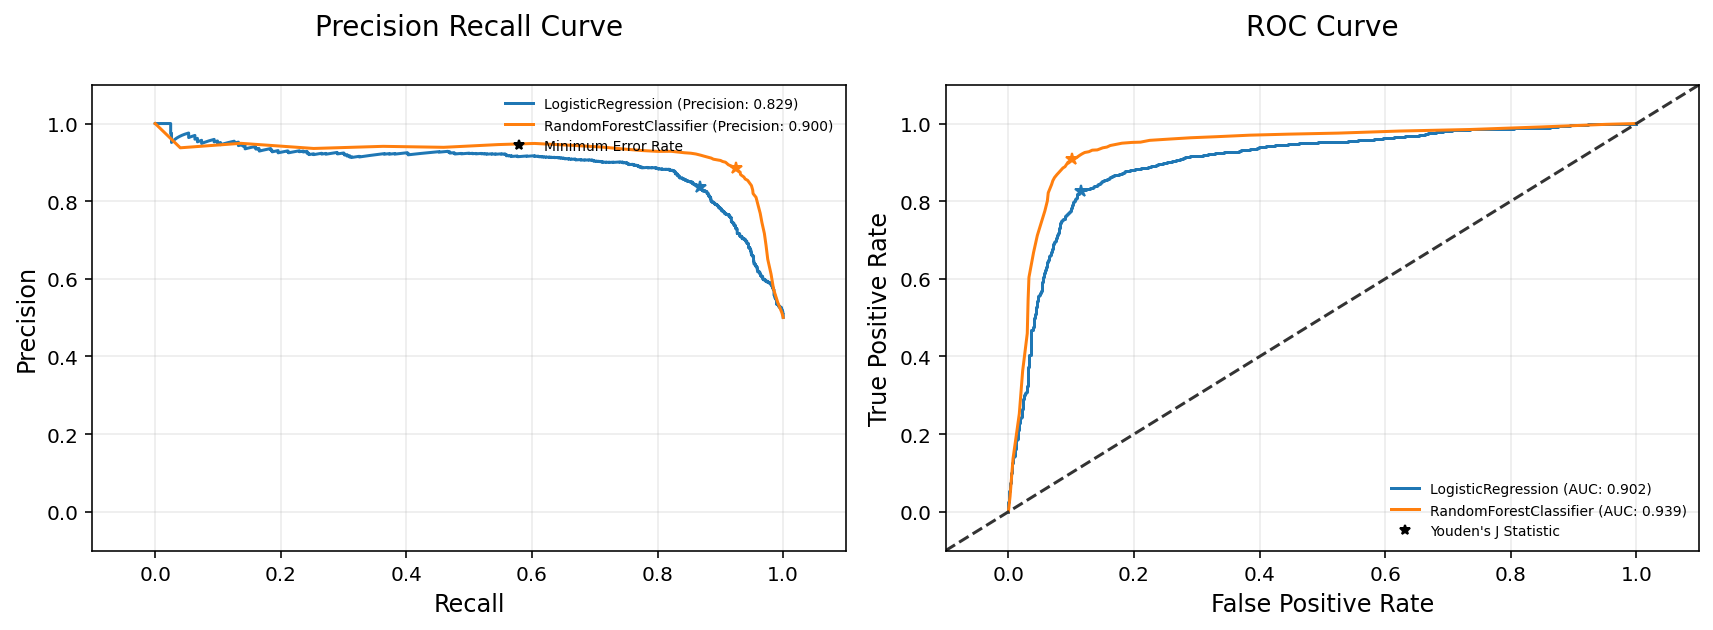

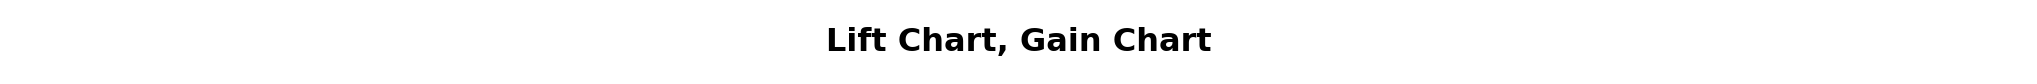

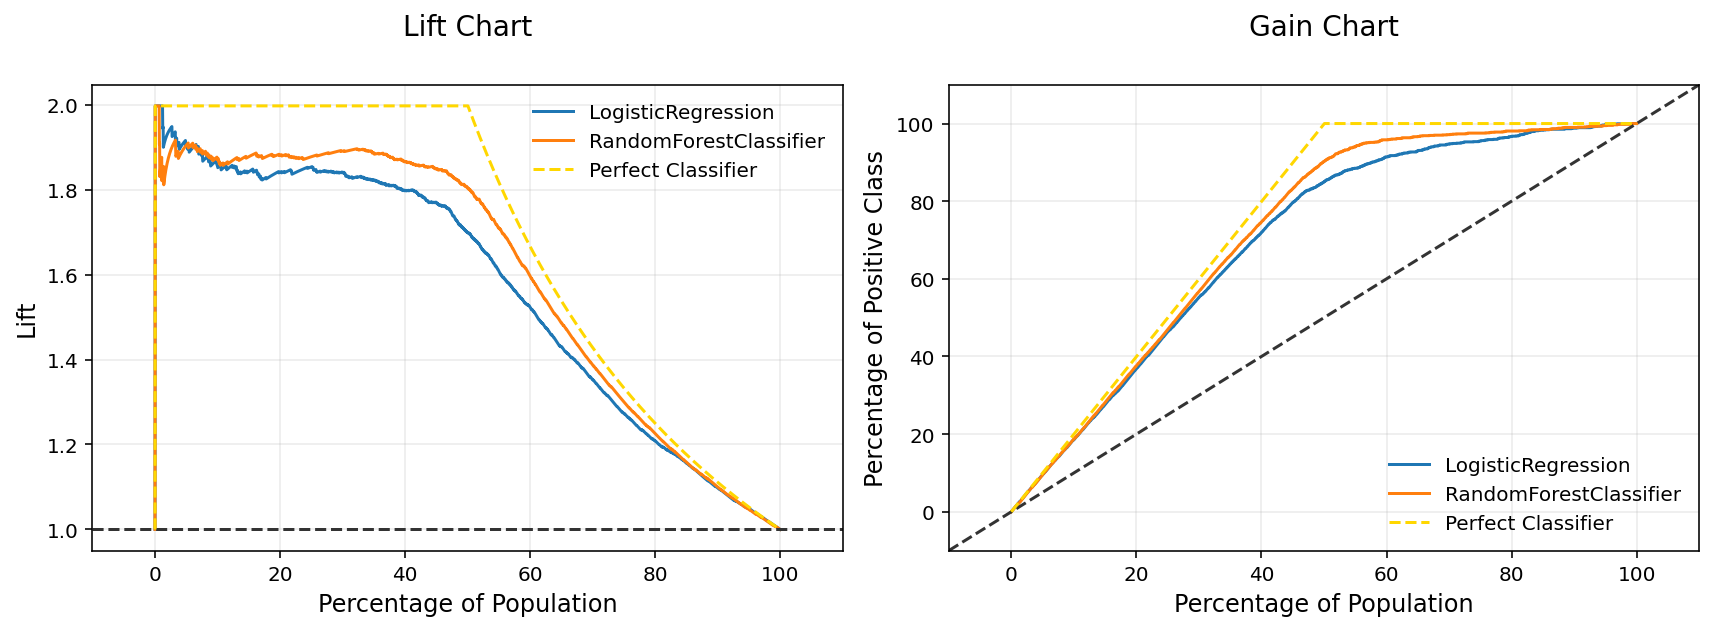

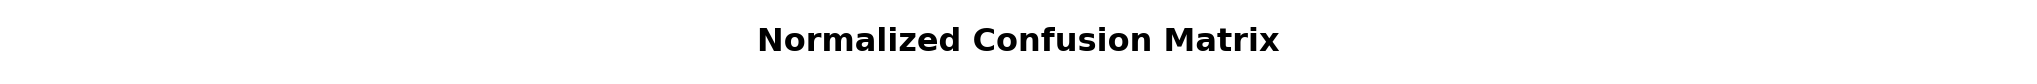

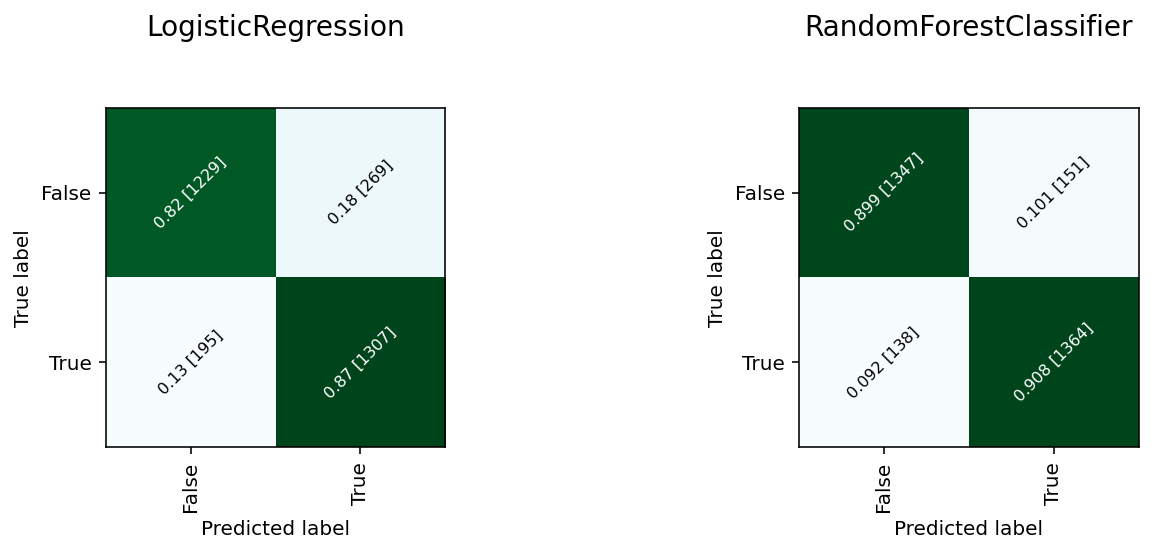

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from ads.common.model import ADSModel
from ads.common.data import ADSData
from ads.evaluations.evaluator import ADSEvaluator

seed = 42


X, y = make_classification(n_samples=10000, n_features=25, n_classes=2, flip_y=0.1)


trainx, testx, trainy, testy = train_test_split(X, y, test_size=0.30, random_state=seed)


lr_clf = LogisticRegression(
    random_state=0, solver="lbfgs", multi_class="multinomial"
).fit(trainx, trainy)

rf_clf = RandomForestClassifier(n_estimators=50).fit(trainx, trainy)

bin_lr_model = ADSModel.from_estimator(lr_clf, classes=[0, 1])
bin_rf_model = ADSModel.from_estimator(rf_clf, classes=[0, 1])

evaluator = ADSEvaluator(
    ADSData(testx, testy),
    models=[bin_lr_model, bin_rf_model],
    training_data=ADSData(trainx, trainy),
)


print(evaluator.metrics)

evaluator.show_in_notebook(perfect=True) 

  warnings.warn(



,LogisticRegression,RandomForestClassifier
Accuracy,0.8487,0.8530
Hamming distance,0.1513,0.1470
precision_weighted,0.8478,0.8523
precision_micro,0.8487,0.8530
recall_weighted,0.8487,0.8530
recall_micro,0.8487,0.8530
f1_weighted,0.8479,0.8524
f1_micro,0.8487,0.8530


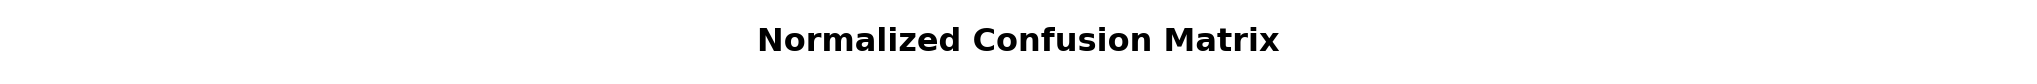

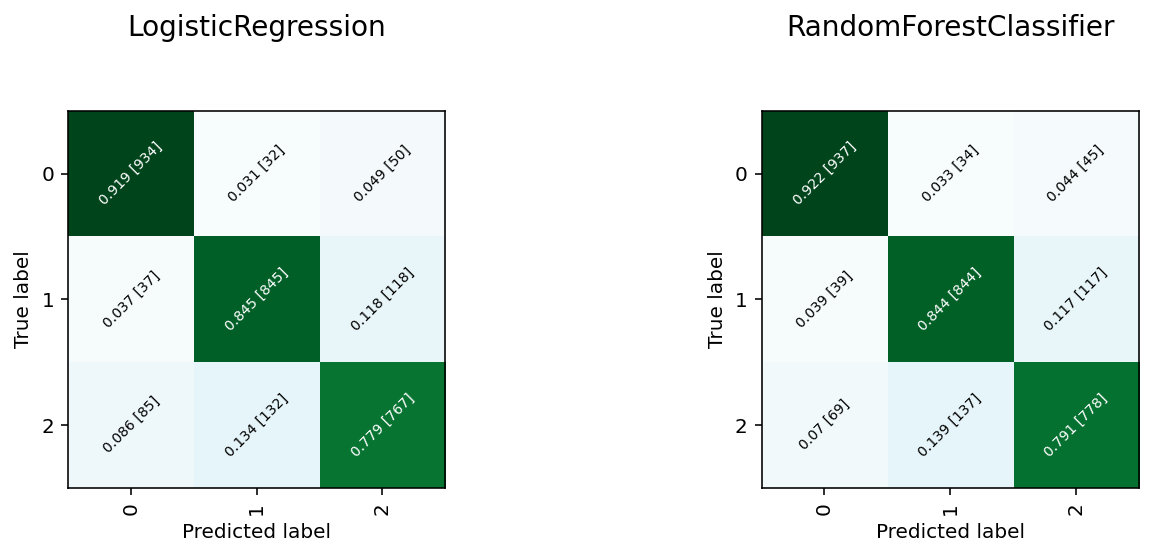

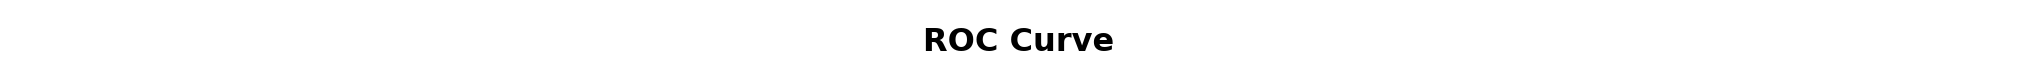

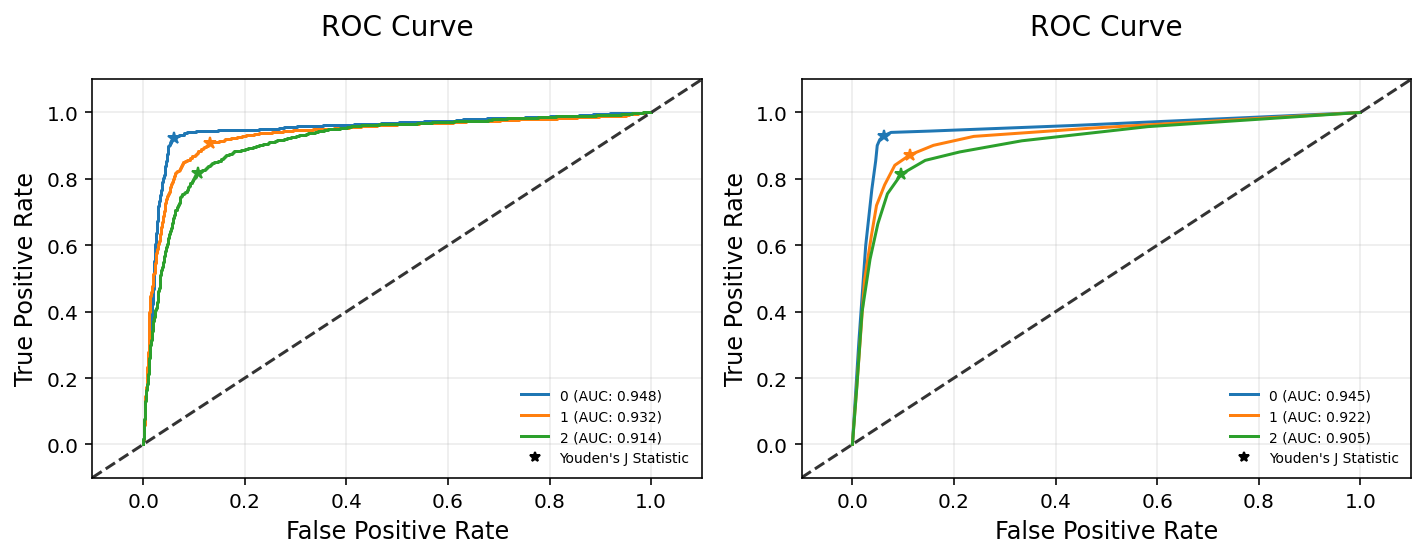

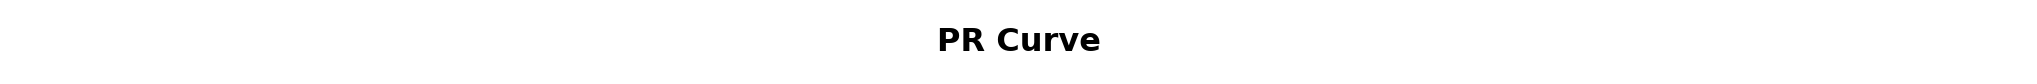

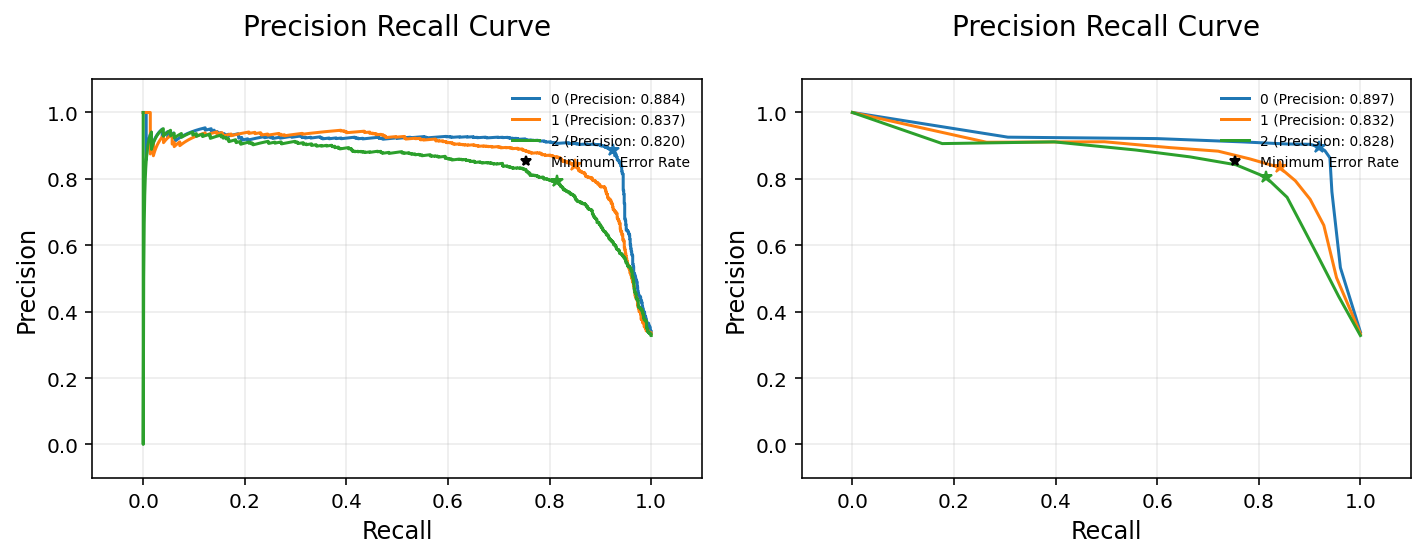

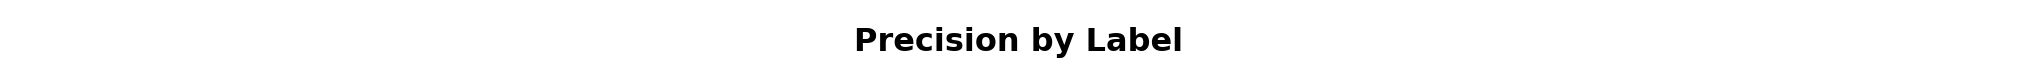

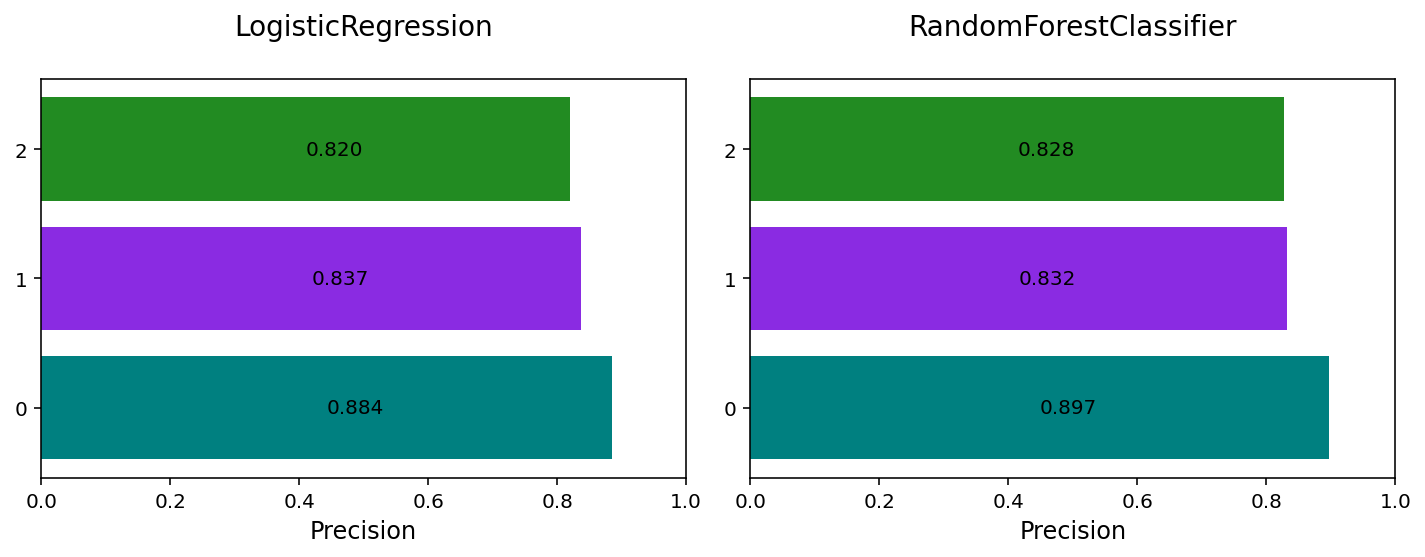

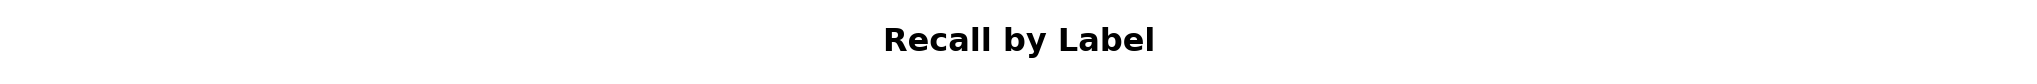

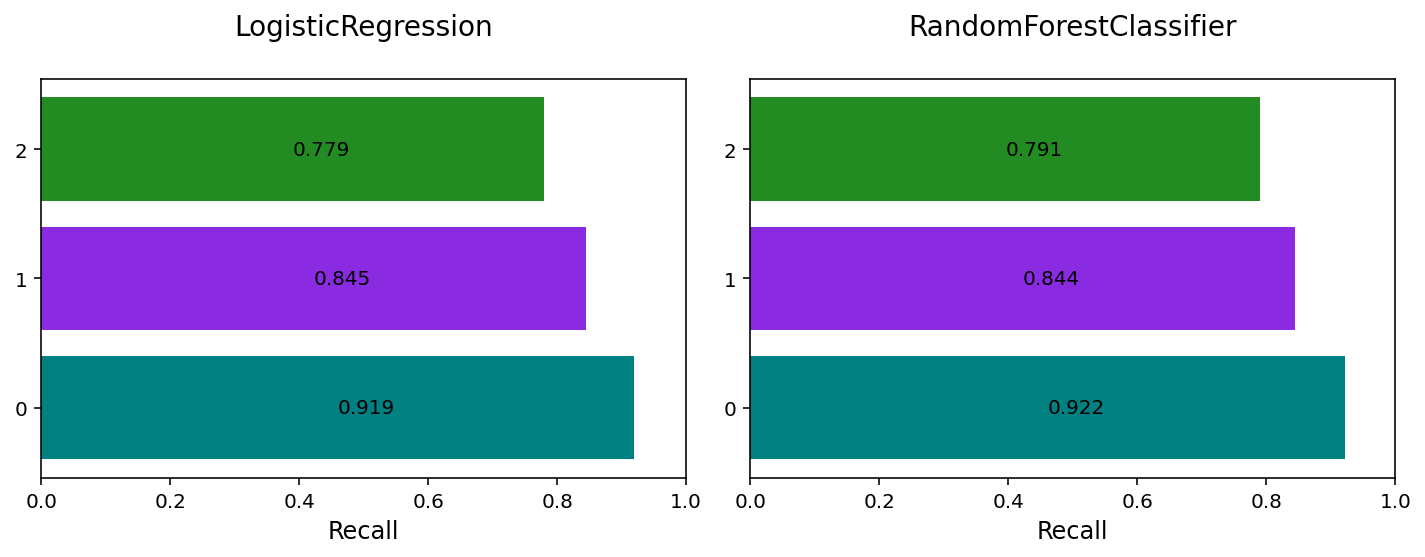

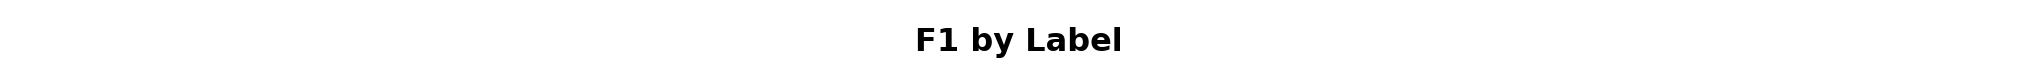

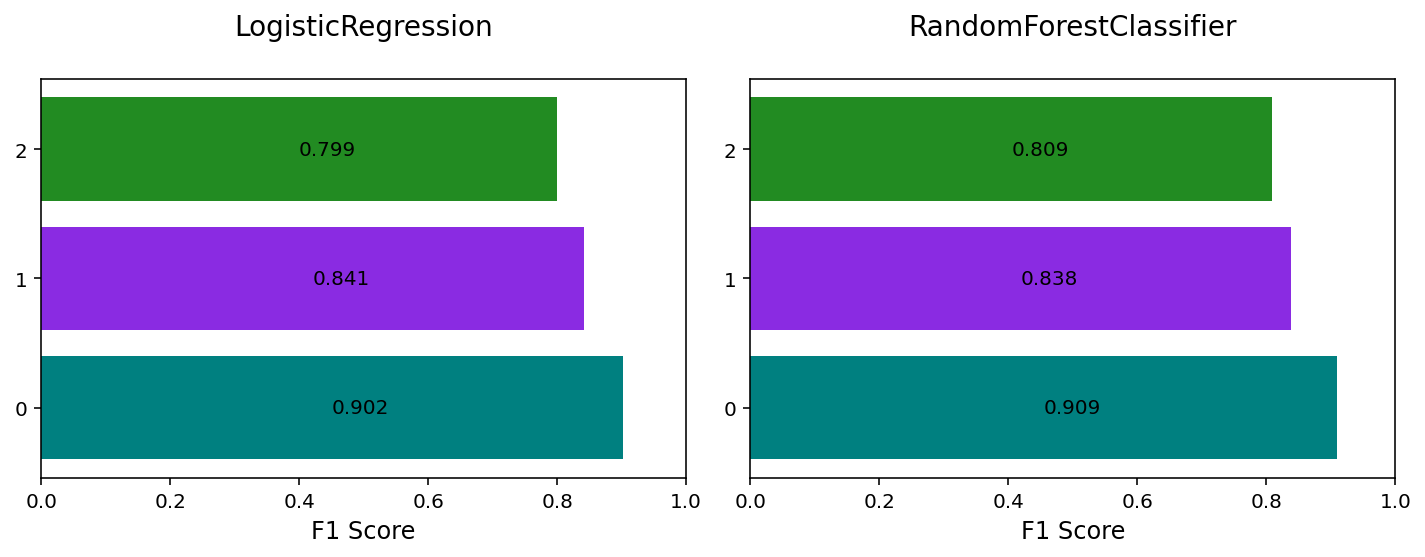

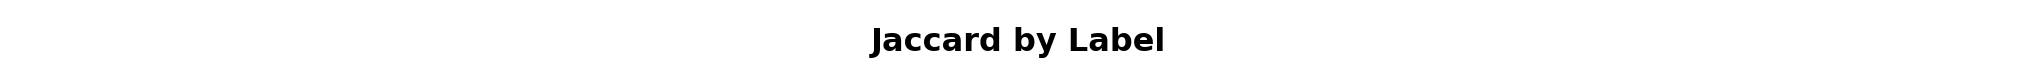

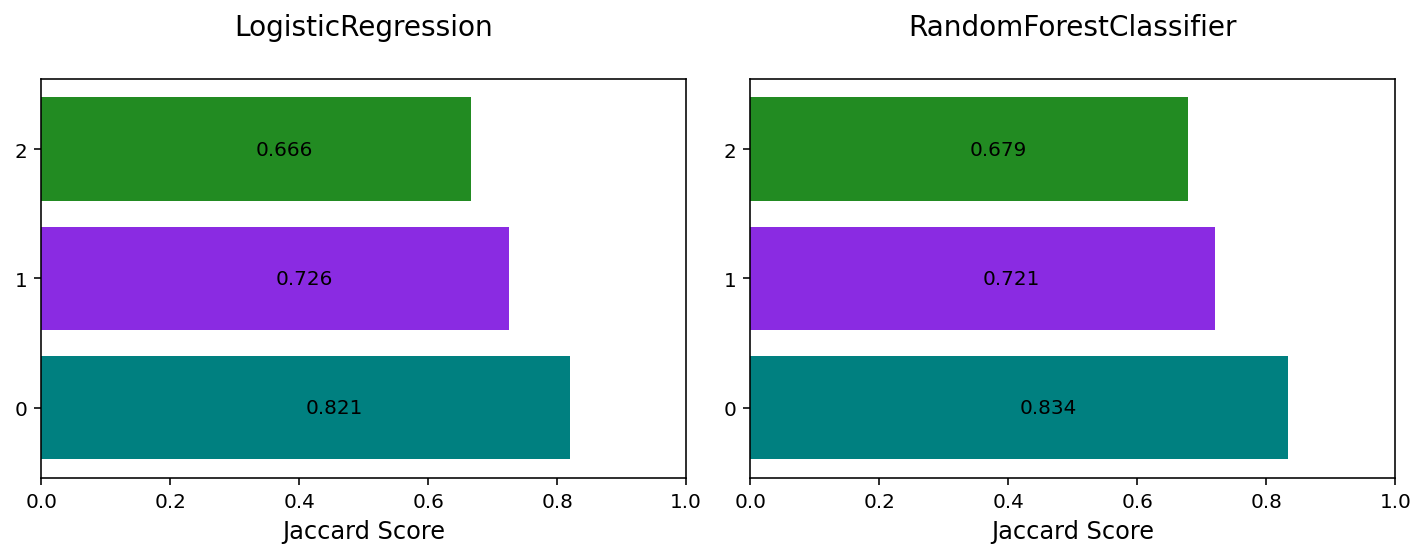

In [3]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from ads.common.model import ADSModel
from ads.common.data import ADSData
from ads.evaluations.evaluator import ADSEvaluator

seed = 42


X, y = make_classification(
    n_samples=10000, n_features=25, n_classes=3, flip_y=0.1, n_clusters_per_class=1
)


trainx, testx, trainy, testy = train_test_split(X, y, test_size=0.30, random_state=seed)


lr_multi_clf = LogisticRegression(
    random_state=0, solver="lbfgs", multi_class="multinomial"
).fit(trainx, trainy)

rf_multi_clf = RandomForestClassifier(n_estimators=10).fit(trainx, trainy)

multi_lr_model = ADSModel.from_estimator(lr_multi_clf)
multi_rf_model = ADSModel.from_estimator(rf_multi_clf)


evaluator = ADSEvaluator(
    ADSData(testx, testy),
    models=[multi_lr_model, multi_rf_model],
)


print(evaluator.metrics)

evaluator.show_in_notebook(perfect=True) 

,LinearRegression,Lasso
r2_score,1.0000,1.0000
mse,0.0000,0.0204
mae,0.0000,0.1142


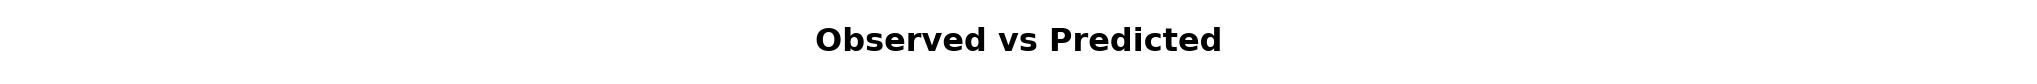

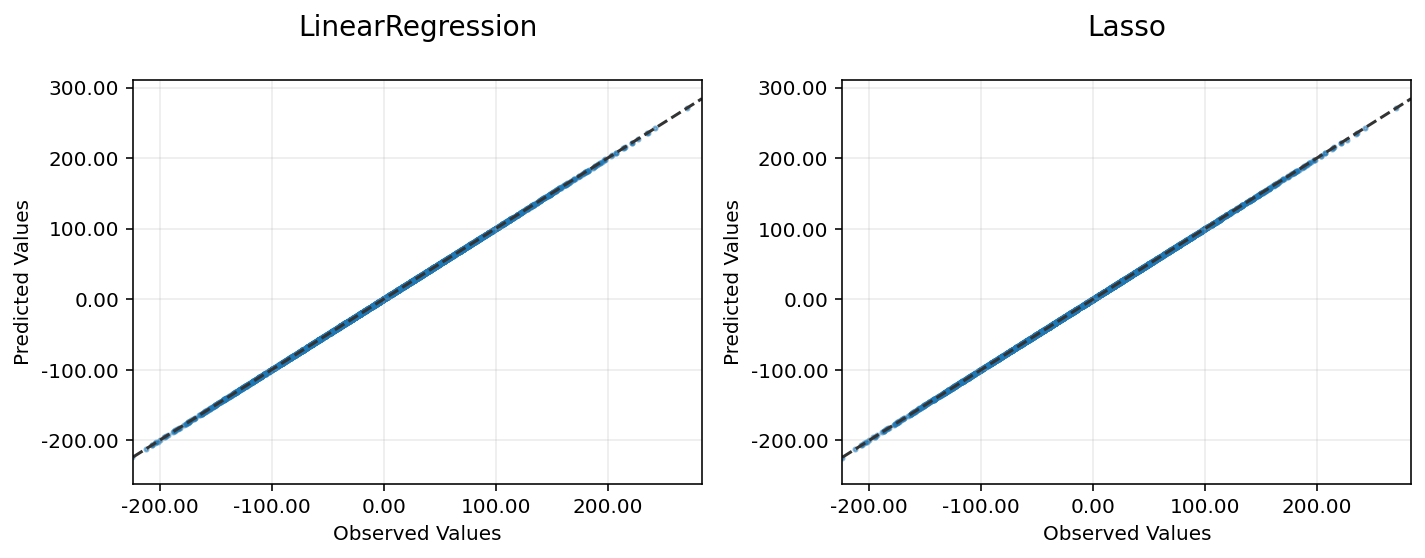

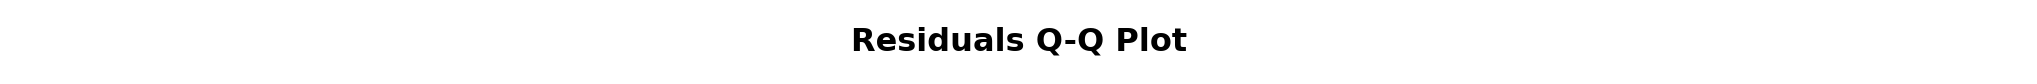

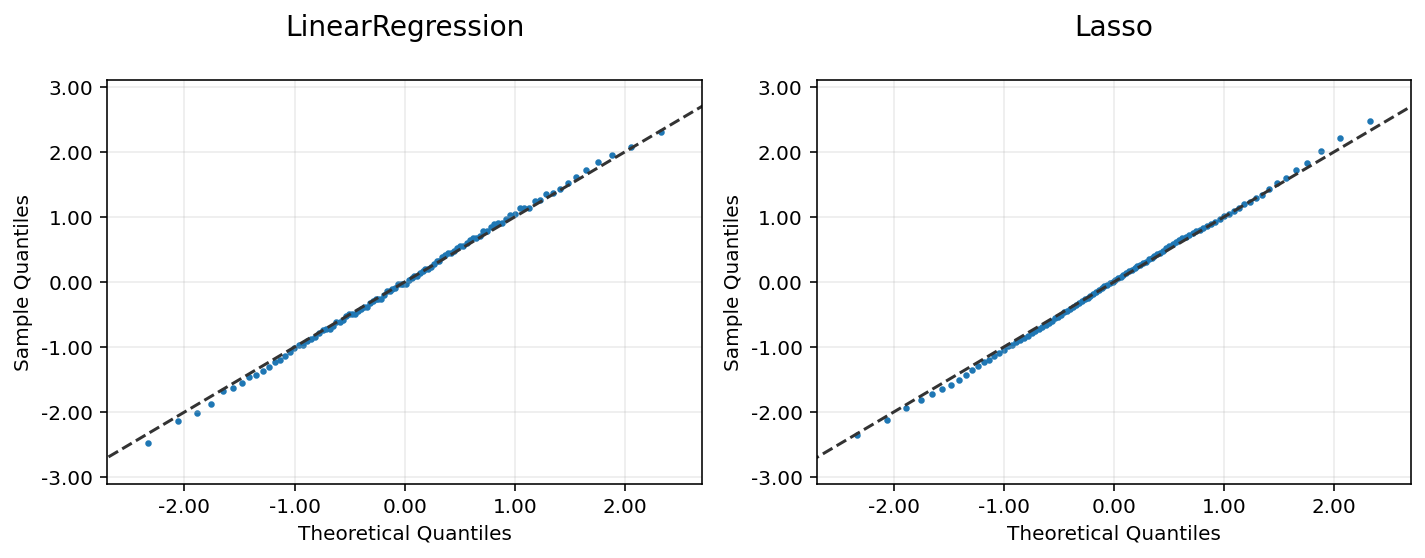

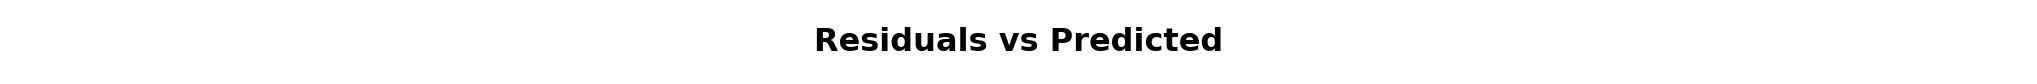

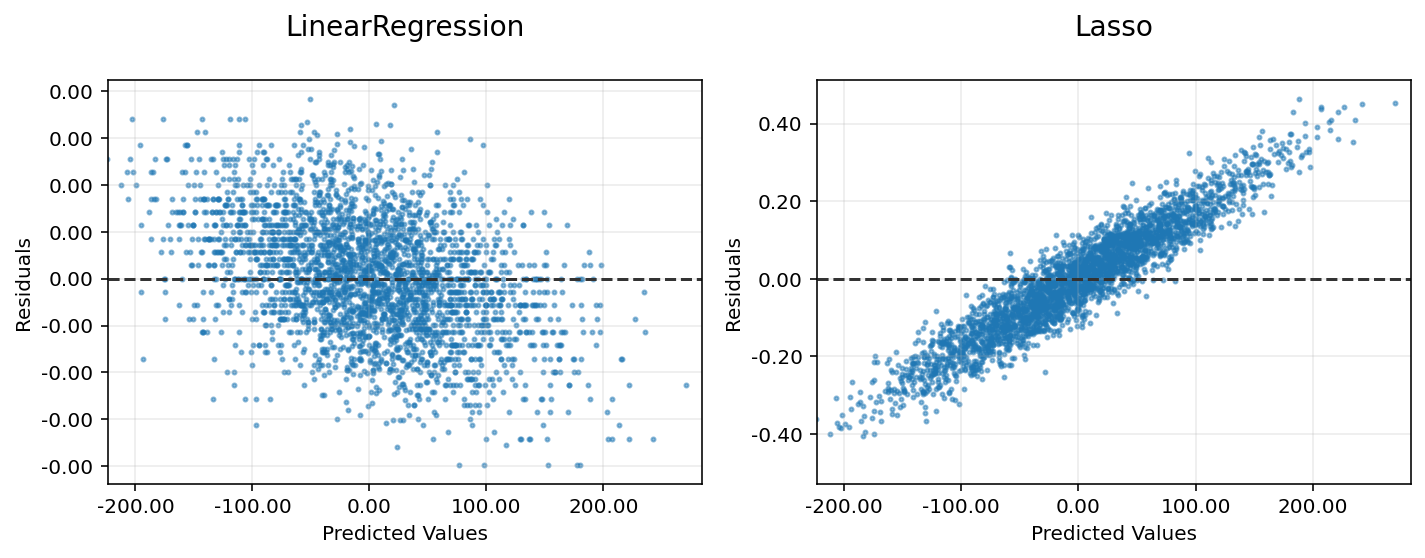

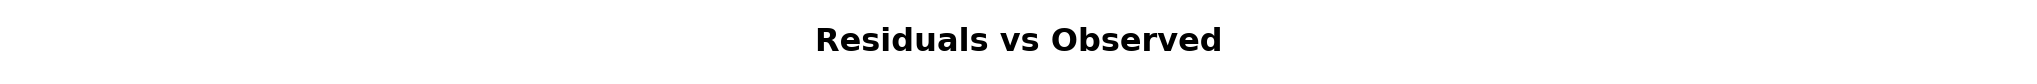

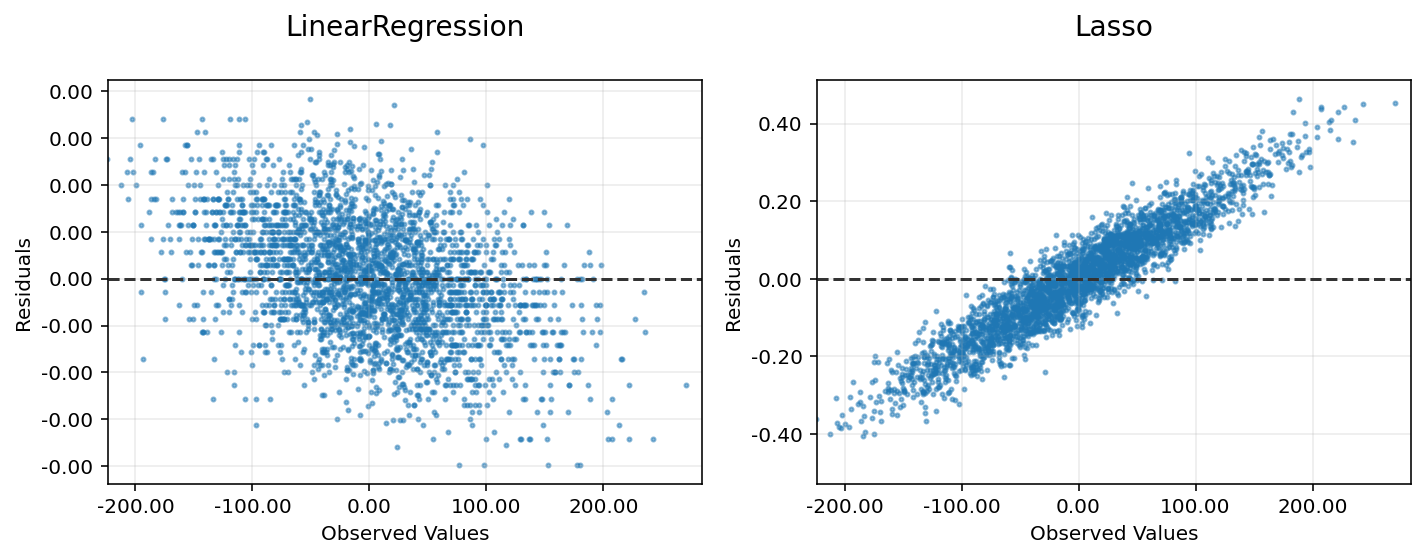

In [5]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestClassifier

from ads.common.model import ADSModel
from ads.common.data import ADSData
from ads.evaluations.evaluator import ADSEvaluator

seed = 42


X, y = make_regression(n_samples=10000, n_features=10, n_informative=2, random_state=42)

trainx, testx, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=seed)

lin_reg = LinearRegression().fit(trainx, trainy)

lasso_reg = Lasso(alpha=0.1).fit(trainx, trainy)


lin_reg_model = ADSModel.from_estimator(lin_reg)
lasso_reg_model = ADSModel.from_estimator(lasso_reg)

reg_evaluator = ADSEvaluator(
    ADSData(testx, testy), models=[lin_reg_model, lasso_reg_model]
)

print(reg_evaluator.metrics)

reg_evaluator.show_in_notebook(perfect=True) 